<div style="background: linear-gradient(135deg, #fdfbfb 0%, #ebedee 100%); padding: 2rem; border-radius: 20px; text-align: center; color: #2c3e50; font-family: 'Merriweather', serif; box-shadow: 0 8px 24px rgba(0,0,0,0.15); max-width: 950px; margin: auto;">
  <h1 style="margin: 0; font-size: 2.4rem; color: #2d98da; text-shadow: 1px 1px 2px rgba(0,0,0,0.15);">
    Sign Language Recognition with CNN
  </h1>
  <p style="margin: .5rem 0 1.5rem; text-align: center; font-size: 1.15rem;">
    A Complete Journey from Dataset Exploration to Model Inference
  </p>
  <img src="https://imgs.search.brave.com/S_cE-XPXE52dqIKtyvidvyCClAB631tX6hzO0tfVIrA/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5pc3RvY2twaG90/by5jb20vaWQvMTY1/NzkyNDk4L3ZlY3Rv/ci9zaWduLWxhbmd1/YWdlLWxldHRlci1u/LW8tcC1xLmpwZz9z/PTYxMng2MTImdz0w/Jms9MjAmYz00bmV5/c0lEUHBRM3dESk9n/aXR3UE50TDJFMkRa/ckVDZW9nVXBxZjFs/SzA0PQ"
       alt="Sign Language"
       style="width: 25%; border-radius: 16px; box-shadow: 0 4px 16px rgba(0,0,0,0.2); display: block; margin: auto;" />
</div>

<div style="background: #f7fbfc; padding: 1.8rem; border-radius: 20px; color: #34495e; font-family: 'Lora', serif; max-width: 850px; margin: 2rem auto; box-shadow: 0 4px 12px rgba(0,0,0,0.08);">
  <p style="font-size: 1.1rem; margin-bottom: 1rem;">
    This notebook showcases a complete pipeline for recognizing 5-class hand signs using deep learning. Steps covered:
  </p>
  <ul style="list-style: none; padding: 0;">
    <li style="background: #dff6f5; padding: .8rem 1rem; border-radius: 10px; margin-bottom: .7rem;">
      <strong>📂 Dataset Analysis:</strong> Explore folder structure, show sample images, count per class, and inspect image dimensions.
    </li>
    <li style="background: #dff6f5; padding: .8rem 1rem; border-radius: 10px; margin-bottom: .7rem;">
      <strong>🧠 CNN Model Training:</strong> Trains a custom convolutional neural network (CNN) to classify signs with high accuracy.
    </li>
    <li style="background: #dff6f5; padding: .8rem 1rem; border-radius: 10px; margin-bottom: .7rem;">
      <strong>💾 Model Saving:</strong> Saves trained model weights to <code>/kaggle/working/sign_language_cnn.pth</code>.
    </li>
    <li style="background: #dff6f5; padding: .8rem 1rem; border-radius: 10px; margin-bottom: .7rem;">
      <strong>🔍 Inference:</strong> Loads the model and predicts the class of any input image using PyTorch.
    </li>
  </ul>

  <p style="font-size: 1.05rem; margin-top: 1.5rem;">
    This end-to-end solution demonstrates how to take raw image data, understand it, model it with CNNs, and deploy the model for predictions — enabling <strong style="color: #2d98da;">real-world sign language recognition</strong>.
  </p>

  <p style="text-align: center; margin-top: 2rem;">
    <a href="#model-training" style="display: inline-block; padding: .7rem 1.4rem; background: #2d98da; color: #fff; border-radius: 12px; text-decoration: none; font-weight: bold; box-shadow: 0 4px 8px rgba(0,0,0,0.1); transition: background .3s;">
      Explore the Full Pipeline →
    </a>
  </p>
</div>

<hr style="border: none; height: 3px; background: linear-gradient(90deg, #a2ded0, #dff9fb); margin: 3rem auto; width: 60%;" />


In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


DATASET_PATH = "/kaggle/input/sign-language-recognition/5_class_reduced_test_50/5_class_reduced_test_50"

# List all top-level folders

In [2]:
folders = os.listdir(DATASET_PATH)
print("Top-level directories:", folders)

Top-level directories: ['I', 'tall', 'beautiful', 'quiet', 'you']


# List class dir

In [3]:
classes = [c for c in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, c))]
print("Classes found:", classes)

Classes found: ['I', 'tall', 'beautiful', 'quiet', 'you']


# Plot sample images

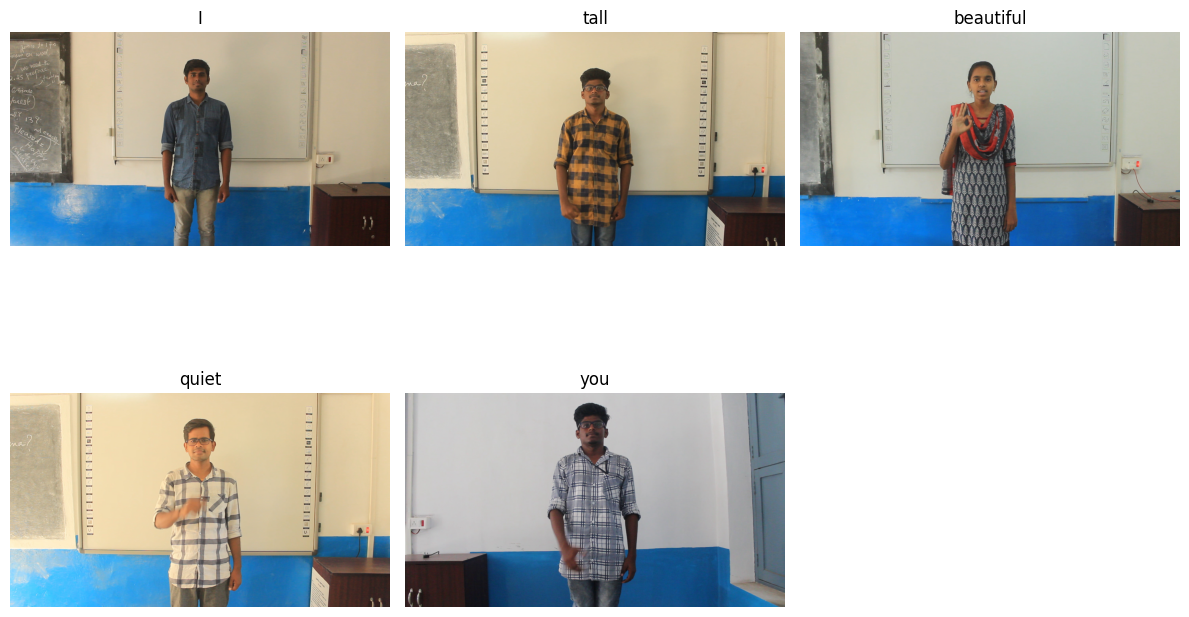

In [4]:
plt.figure(figsize=(12, 8))
for i, class_name in enumerate(classes[:6]):
    class_path = os.path.join(DATASET_PATH, class_name)

    # Only get image files
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    if not image_files:
        continue

    sample_img = random.choice(image_files)
    img_path = os.path.join(class_path, sample_img)
    img = mpimg.imread(img_path)

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Class Distribution

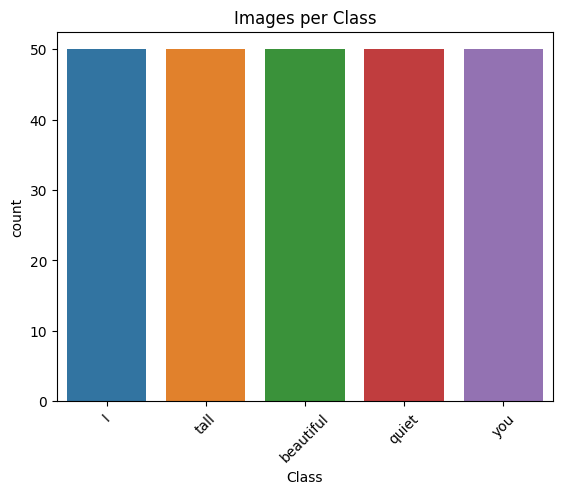

In [5]:
import seaborn as sns
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(DATASET_PATH, cls)))
                for cls in classes}

df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['count'])
df = df.reset_index().rename(columns={'index': 'Class'})
sns.barplot(data=df, x='Class', y='count')
plt.title("Images per Class")
plt.xticks(rotation=45)
plt.show()

# Image Dimension Consistency

In [6]:
from PIL import Image

dimensions = []
for cls in classes:
    class_path = os.path.join(DATASET_PATH, cls)
    for img_file in os.listdir(class_path)[:10]: 
        img_path = os.path.join(class_path, img_file)
        img = Image.open(img_path)
        dimensions.append(img.size)

pd.Series(dimensions).value_counts()

(1920, 1080)    50
Name: count, dtype: int64

# corrupt images

In [7]:
from PIL import UnidentifiedImageError
bad_images = []
for cls in classes:
    for img_file in os.listdir(os.path.join(DATASET_PATH, cls)):
        try:
            img = Image.open(os.path.join(DATASET_PATH, cls, img_file))
            img.verify()
        except (UnidentifiedImageError, IOError):
            bad_images.append(os.path.join(cls, img_file))
print("Corrupt images found:", bad_images)

Corrupt images found: []


# Model Training

In [8]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

In [9]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

CLASSES = sorted(os.listdir(DATASET_PATH))

In [10]:
class SignDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.transform = transform
        self.data = []
        self.classes = sorted(os.listdir(root_dir))
        for label_idx, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for fname in os.listdir(class_dir):
                self.data.append((os.path.join(class_dir, fname), label_idx))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

In [11]:
dataset = SignDataset(DATASET_PATH, transform=transform)

# split 
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_set, test_set = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_set, batch_size=16, shuffle=True)
test_loader = DataLoader(test_set, batch_size=16, shuffle=False)

## CNN Model

In [12]:
class SignCNN(nn.Module):
    def __init__(self, num_classes):
        super(SignCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 256), nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [13]:
model = SignCNN(num_classes=len(CLASSES))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# TRAINING 

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

EPOCHS = 5
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {avg_loss:.4f}")


Epoch [1/5], Loss: 1.1028
Epoch [2/5], Loss: 0.5844
Epoch [3/5], Loss: 0.3157
Epoch [4/5], Loss: 0.2533
Epoch [5/5], Loss: 0.2625


# EVALUATION 


Classification Report:

              precision    recall  f1-score   support

           I       1.00      0.64      0.78        11
   beautiful       1.00      1.00      1.00         8
       quiet       1.00      0.88      0.93         8
        tall       0.91      1.00      0.95        10
         you       0.76      1.00      0.87        13

    accuracy                           0.90        50
   macro avg       0.93      0.90      0.91        50
weighted avg       0.92      0.90      0.90        50



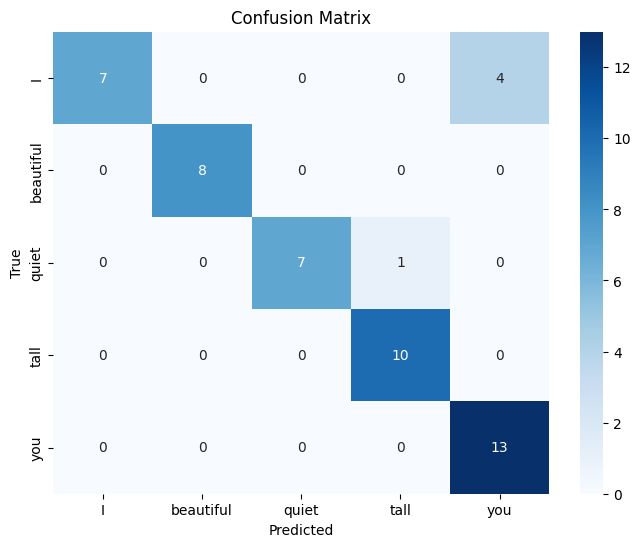

In [15]:
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

print("\nClassification Report:\n")
print(classification_report(all_labels, all_preds, target_names=CLASSES))

conf_mat = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, xticklabels=CLASSES, yticklabels=CLASSES, cmap="Blues", fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## SAVE MODEL

In [16]:
torch.save(model.state_dict(), "sign_language_cnn.pth")
print("Model saved as sign_language_cnn.pth")

Model saved as sign_language_cnn.pth


In [17]:
import torch
from torch import nn
from torchvision import transforms
from PIL import Image
import os

CLASSES = sorted(os.listdir("/kaggle/input/sign-language-recognition/5_class_reduced_test_50/5_class_reduced_test_50"))

# Recreate the model architecture
class SignCNN(nn.Module):
    def __init__(self, num_classes):
        super(SignCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 256), nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Initialize and load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SignCNN(num_classes=len(CLASSES))
model.load_state_dict(torch.load("/kaggle/working/sign_language_cnn.pth", map_location=device))
model.to(device)
model.eval()


SignCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=32768, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=256, out_features=5, bias=True)
  )
)

# prediction function

In [18]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
        class_index = predicted.item()

    return CLASSES[class_index]


# Example image from dataset

In [19]:
test_img_path = "/kaggle/input/sign-language-recognition/5_class_reduced_test_50/5_class_reduced_test_50/quiet/2. quiet_temp_MVI_9537_16.jpg" 
prediction = predict_image(test_img_path)
print(f"Predicted class: {prediction}")

Predicted class: quiet


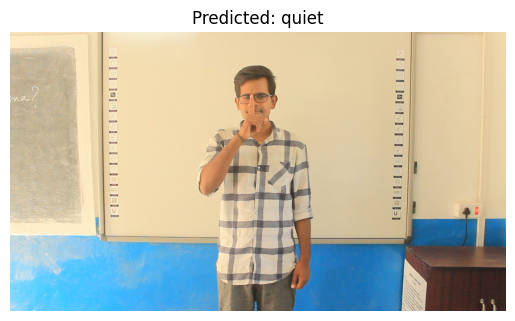

In [20]:
import matplotlib.pyplot as plt

img = Image.open(test_img_path)
plt.imshow(img)
plt.title(f"Predicted: {prediction}")
plt.axis("off")
plt.show()